In [427]:
!ls  -l

total 1488
-rw-r--r--  1 sampathm  staff   61150 Nov  1 00:06 EDA.ipynb
-rw-r--r--@ 1 sampathm  staff  140966 Nov  1 00:43 spooky-author-identification.ipynb
-rw-r--r--  1 sampathm  staff  555695 Nov  1 00:45 sub_fe.csv


In [ ]:
scala random seed

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None

In [3]:
## Read the train and test dataset and check the top few lines ##
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
print("Number of rows in train dataset : ",train_df.shape[0])
print("Number of rows in test dataset : ",test_df.shape[0])

Number of rows in train dataset :  19579
Number of rows in test dataset :  8392


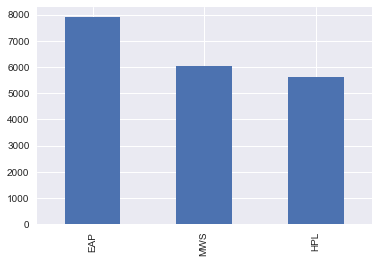

In [9]:
train_df.author.value_counts().plot(kind='bar')

In [80]:
train_df.author.unique().tolist()

['EAP', 'HPL', 'MWS']

In [17]:
[np.random.choice(train_df.index) for _ in range(3)]

[5390, 11964, 11284]

In [31]:
train_df.dtypes

id        object
text      object
author    object
dtype: object

In [82]:
for author in train_df.author.unique().tolist():
    print('--' * 45, author)
    for i in range(3):
        mychoice = np.random.choice(train_df[train_df.author == author].index)
        print(train_df.text[mychoice])
        print('')

------------------------------------------------------------------------------------------ EAP
Upon this I made an effort to get up, in order to put my threat into execution; but the ruffian just reached across the table very deliberately, and hitting me a tap on the forehead with the neck of one of the long bottles, knocked me back into the arm chair from which I had half arisen.

Was that was that was that rouge?

Among other odd ideas, that of universal equality gained ground; and in the face of analogy and of God in despite of the loud warning voice of the laws of gradation so visibly pervading all things in Earth an Heaven wild attempts at an omni prevalent Democracy were made.

------------------------------------------------------------------------------------------ HPL
With one savage kick he sent the morbidity over the edge of the gulf and heard it whimper on some level far below.

It was very dark, for although the sky was clear the moon was now well in the wane, and would no

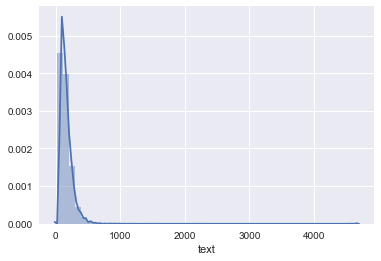

In [54]:
sns.distplot(train_df.text.map(len))

In [56]:
train_df.text.map(len).describe()

count    19579.000000
mean       149.057408
std        106.800189
min         21.000000
25%         81.000000
50%        128.000000
75%        191.000000
max       4663.000000
Name: text, dtype: float64

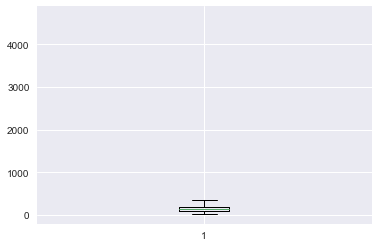

In [61]:
_ = plt.boxplot(train_df.text.map(len))

In [67]:
tmp = train_df.text.map(len).sort_values()

In [78]:
tmp[:-55].shape

(19524,)

([<matplotlib.axis.XTick at 0x1120206d8>,
 <a list of 10 Text xticklabel objects>)

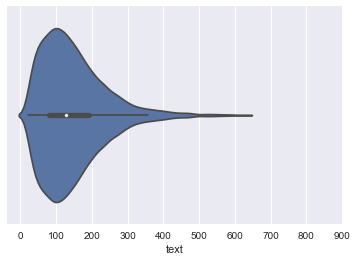

In [79]:
sns.violinplot(tmp[:-55])
plt.xticks([i * 100 for i in range(10)])

## Keywords Analysis  for Each Author

In [83]:
from collections import Counter

In [ ]:
for author in train_df.author.unique().tolist():
    print('--' * 45, author)
    for i in range(3):
        mychoice = np.random.choice(train_df[train_df.author == author].index)
        print(train_df.text[mychoice])
        print('')

In [120]:
data = train_df.text

special_chars  = set()
for each in data:
    raw_data = special_chars.union(set(each.lower()))

print(sorted(list(raw_data)))

[' ', ',', '.', 'a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'w', 'y']


In [183]:
for author in train_df.author.unique():
    print('--' * 35 , author)
    data = train_df[train_df.author == author].text

    special_chars  = set()
    for each in data:
        raw_data = special_chars.union(set(each.lower()))
        
    print(sorted(list(raw_data)))

---------------------------------------------------------------------- EAP
[' ', '"', ',', '.', 'a', 'c', 'd', 'e', 'f', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'v', 'w', 'y']
---------------------------------------------------------------------- HPL
[' ', ',', '.', 'a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'w', 'y']
---------------------------------------------------------------------- MWS
[' ', ',', '.', ';', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']


In [193]:
# mask = train_df.text.map(lambda x: (x.lower().count('"') or x.lower().count("'")))

mask = train_df.text.map(lambda x: (x.lower().count(' he ')))

# mask = train_df.text.map(lambda x: (x.lower().count('"') or x.lower().count("'")) > 0 )

tmp = pd.DataFrame({'a': train_df.author, 'b': mask, 'c': 1})

print(tmp.groupby(['a', 'b']).count())

          c
a   b      
EAP 0  7139
    1   610
    2   119
    3    20
    4     7
    5     2
    6     2
    7     1
HPL 0  4619
    1   754
    2   206
    3    48
    4     7
    5     1
MWS 0  5228
    1   585
    2   172
    3    39
    4    15
    5     4
    6     1


In [223]:
data = train_df[train_df.author == author].text

raw_data  = ''

for each in data:
    raw_data += each + ' '

In [224]:
tmp = train_df[train_df.author == author].text
mask = tmp.map(lambda x: ":" in x)
tmp[mask].head().values

array([ 'A youth passed in solitude, my best years spent under your gentle and feminine fosterage, has so refined the groundwork of my character that I cannot overcome an intense distaste to the usual brutality exercised on board ship: I have never believed it to be necessary, and when I heard of a mariner equally noted for his kindliness of heart and the respect and obedience paid to him by his crew, I felt myself peculiarly fortunate in being able to secure his services.',
       'He began to answer with violence: "Yes, yes, I hate you You are my bane, my poison, my disgust Oh No" And then his manner changed, and fixing his eyes on me with an expression that convulsed every nerve and member of my frame "you are none of all these; you are my light, my only one, my life.',
       'Look, I weep: for more than two years I have never enjoyed one moment free from anguish.',
       'I soon arrived at the hut: the door was ajar.',
       'I heard the next morning from the steward that upon h

In [113]:
tmp = train_df[train_df.author == author].text
mask = tmp.map(lambda x: "?" in x)
tmp[mask].head().values

array(['why string my nerves and renew my wearied efforts ah, why?',
       '"Are you better now, sir?" said she.',
       'Alas, what will become of us?',
       '"What can I do?" she cried, "I am lost we are both for ever lost But come come with me, Lionel; here I must not stay, we can get a chaise at the nearest post house; yet perhaps we have time come, O come with me to save and protect me" When I heard her piteous demands, while with disordered dress, dishevelled hair, and aghast looks, she wrung her hands the idea shot across me is she also mad? "Sweet one," and I folded her to my heart, "better repose than wander further; rest my beloved, I will make a fire you are chill."',
       'The landlady met her in the passage; the poor creature asked, "Is my husband here?'], dtype=object)

In [107]:
raw_data = raw_data.lower()

raw_data[:500]

'how lovely is spring as we looked from windsor terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair. a youth passed in solitude, my best years spent under your gentle and feminine fosterage, has so refined the groundwork of my character that i cannot overcome an intense distaste to the usual brutality exercised on board ship: i have never believed it to be necessary, and when i heard of a ma'

In [228]:
author

'MWS'

In [387]:
def transform(data):
    data = data.replace('"', ' $ ')
    data = data.replace("'", ' $ ')
    data = data.replace(",", ' , ')
    data = data.replace(".", ' . ')
    data = data.lower()
    return data


def get_author_data(author):
    data = train_df[train_df.author == author].text
    raw_data  = ''
    for each in data:
        raw_data += each + ' '

    tmp = Counter(transform(raw_data).split())
    df =  pd.DataFrame(tmp, index=range(1)).T
    df.columns = [author]
    return df

In [373]:
train_df.author.value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [374]:
## Average number of times a value is repeated ##
MWS =  get_author_data('MWS') / 7900
HPL =  get_author_data('HPL') / 6044
EAP =  get_author_data('EAP') / 5635

keywords_df = MWS.join(HPL).join(EAP).fillna(0)

In [375]:
def get_most_used_keyword(author, threshold=0.1):
    print("---" * 45 + ' Author: ' + author + ' Threshold ' + str(threshold))
    tmp = keywords_df.sort_values([author], ascending=False)
    mask = tmp[author] > threshold
    aset = tmp[author][mask].index.tolist()
    print(aset)
    return set(aset)

In [456]:
aset = get_most_used_keyword('EAP', threshold=0.01)
bset = get_most_used_keyword('HPL', threshold=0.01)
cset = get_most_used_keyword('MWS', threshold=0.01)

--------------------------------------------------------------------------------------------------------------------------------------- Author: EAP Threshold 0.01
[',', 'the', 'of', '.', 'and', 'to', 'a', '$', 'in', 'i', 'that', 'it', 'was', 'my', 'with', 'is', 'at', 'as', 'which', 'for', 'had', 'he', 'this', 'his', 'not', 'by', 'but', 'be', 'have', 'upon', 'from', 'me', 'all', 'no', 'we', 'an', 'so', 'or', 'you', 'were', 'been', 'one', 'there', 'its', 'on', 'very', 'her', 'more', 'are', 'now', 'could', 'into', 'some', 'than', 'what', 'when', 'him', 'would', 's', 'about', 'will', 'any', 'these', 'said', 'if', 'then', 'they', 'our', 'their', 'who', 'most', 'up', 'has', 'she', 'little', 'only', 'out', 'made', 'say', 'even', 'well', 'time', 'however', 'them', 'first', 'man', 'such', 'here', 'thus', 'other', 'us', 'yet', 'much', 'found', 'great', 'before', 'should', 'long', 'two', 'through', 'myself', 'your', 'every', 'being', 'over', 'own', 'did', 'never', 'after', 'must', 'still', 'while

In [457]:
keys1 = set(aset) - set(bset) - set(cset)
print(keys1)

{'name', 'natural', 'however', 'continued', 'whole', 'point', 'either', 'perhaps', 'five', 'latter', 'end', 'done', 'feet', 'ordinary', 'looking', 'box', 'why', 'view', 'altogether', 'doubt', 'fact', 'lady', 'true', 'observed', 'morning', 'minutes', 'taken', 'question', 'mere', 'took', 'cannot', 'm', 'give', 'lay', 'mr', 'called', 'twenty', 'arm', 'eye', 'attention', 'four', 'person', 'get', 'nearly', 'speak', 'thousand', 'machine', 'rather', 'although', 'therefore', 'balloon', 'case', 'present', 'merely', 'really', 'itself', 'character', 'longer', 'sense', 'oh', 'portion', 'idea', 'scarcely', 'truth', 'matter', 'account', 'period', 'figure', 'deep', 'between', 'form', 'vast', 'main', 'manner', 'reason', 'means', 'sure', 'brought', 'fell', 'l', 'circumstances', 'madame', 'atmosphere', 'length', 'immediately', 'spoke', 'stood', 'believe', 'general', 'until', 'wild', 'impossible', 'right', 'corpse', 'large', 'word', 'object', 'quite', 'appearance', 'given', 'within', 'gentleman', 'de', '

In [458]:
keys2 = set(bset) - set(cset) - set(aset)
print(keys2)

{'outside', 'town', 'almost', 'strange', 'street', 'look', 'd', 'houses', 'walls', 'dream', 'sight', 'ye', 'against', 'ancient', 'white', 'because', 'behind', 'told', 'terrible', 'dreams', 'began', 'west', 'hideous', 'past', 'window', 'dead', 'toward', 'enough', 'stone', 'windows', 'till', 'hill', 'uncle', 'grew', 'though', 'floor', 'space', 'sound', 'horror', 'sky', 'people', 'unknown'}


In [459]:
keys3 = set(cset) - set(aset) - set(bset)
print(keys3)

{'misery', 'thoughts', 'england', 'country', 'change', 'sun', 'become', 'dear', 'feelings', 'happiness', 'despair', 'often', 'perdita', 'feel', 'idris', 'adrian', 'mother', 'return', 'love', 'lost', 'towards', 'me;', 'power', 'poor', 'father', 'raymond', 'hope', 'tears'}


In [460]:
print(keys1.union(keys2).union(keys3))

{'natural', 'whole', 'point', 'thoughts', 'five', 'end', 'done', 'feet', 'ordinary', 'box', 'why', 'view', 'fact', 'mother', 'uncle', 'lady', 'observed', 'father', 'minutes', 'sky', 'question', 'mere', 'cannot', 'look', 'country', 'attention', 'dear', 'machine', 'adrian', 'balloon', 'case', 'merely', 'towards', 'really', 'itself', 'hope', 'tears', 'window', 'people', 'sense', 'oh', 'portion', 'idea', 'truth', 'dream', 'period', 'figure', 'between', 'form', 'behind', 'terrible', 'means', 'fell', 'happiness', 'l', 'often', 'feel', 'till', 'circumstances', 'lost', 'grew', 'atmosphere', 'length', 'me;', 'immediately', 'stood', 'believe', 'almost', 'general', 'd', 'england', 'ancient', 'large', 'appearance', 'given', 'feelings', 'gentleman', 'toward', 'windows', 'course', 'water', 'position', 'already', 'days', 'power', 'space', 'difficulty', 'least', 'name', 'however', 'continued', 'either', 'perhaps', 'latter', 'hideous', 'looking', 'despair', 'altogether', 'doubt', 'true', 'morning', 'ta

In [461]:
feature_engg_config = []

def transform(data):
    data = data.lower()
    data = data.replace('"', ' $ ')
    data = data.replace("'", ' $ ')
    data = data.replace(",", ' , ')
    data = data.replace(".", ' . ')
    return data


def get_keywords_count(data, keys):
    words = transform(data).split()    
    ct = 0
    for key in keys:
        ct += words.count(key)
    return ct

# for i, keys in enumerate([keys1, keys2, keys3]):
func = lambda x : get_keywords_count(x, keys1) # keys1  - global
name = 'Keywords_1'
columns = 'text'
feature_engg_config.append({"name": name, "columns": columns, "func": func})

func = lambda x : get_keywords_count(x, keys2) # keys2  - global
name = 'Keywords_2'
columns = 'text'
feature_engg_config.append({"name": name, "columns": columns, "func": func})

func = lambda x : get_keywords_count(x, keys3) # keys3  - global
name = 'Keywords_3'
columns = 'text'
feature_engg_config.append({"name": name, "columns": columns, "func": func})

In [462]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

for fe in feature_engg_config:
    if fe['name']:
        train_df[fe['name']] = train_df[fe['columns']].map(fe['func'])
        test_df[fe['name']] = train_df[fe['columns']].map(fe['func'])

In [463]:
test_df.describe()

,Keywords_1,Keywords_2,Keywords_3
count,8392.000000,8392.000000,8392.000000
mean,0.867731,0.316492,0.220091
std,1.167999,0.665957,0.553479
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,15.000000,8.000000,8.000000
